<a href="https://colab.research.google.com/github/spingtseng/Basic_ML/blob/main/MLP_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets.mnist import load_data
# (x_train, y_train), (x_test, y_test)
(x_train, y_train), (x_test, y_test) = load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# 檢視結構，shape函數：查看結構的維度
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


0:Black
255:White

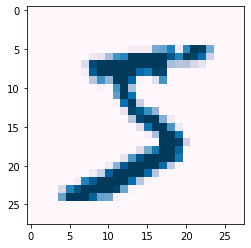

In [4]:
# 顯示數字圖片
# https://matplotlib.org/stable/tutorials/colors/colormaps.html ColorMap
# reverse:_r 顏色反過來
import matplotlib.pyplot as plt
# imshow 把數據轉成圖像
# plt.imshow(x_train[0], cmap="PiYG_r") # 反向
# plt.imshow(x_train[0], cmap="gray"
plt.imshow(x_train[0], cmap = "PuBu")

In [5]:
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


###**激活函數**
####**中間層激活**<br>
<u>relu</u><br>
中間層一律用relu<br><br>
####**輸出層激活**<br>
<u>sigmoid</u><br>
如果最後一層只有一個輸出神經<br>
$sigmoid = \frac{1}{1+e^{-x}}$<br><br>
<u>softmax</u><br>
如果最後一層有兩個以上輸出神經<br>
$softmax_a = \frac{e^a}{e^a+e^b+e^c}$
$softmax_b = \frac{e^b}{e^a+e^b+e^c}$
$softmax_c = \frac{e^c}{e^a+e^b+e^c}$
<br>最大要點：要讓所有神經元加起來等於1


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# unit 這一層要有幾個神經元(必須設定) activation：激活函式(中間層必選relu，避免梯度消失)
layers = [
      # 中間層 relu Parameters 參數 784 * 128 + 128(bias)
      Dense(128, activation = "relu", input_dim=784),
      # 最後一層 需要10根神經元(0-9)，所以使用softmax 128 * 10 + 10(bias)
      Dense(10, activation = "softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 一個神經元(兩個機率): BinaryCrossEntropy
# 多個神經元: pilog(1/qi): CategoricalCrossEntropy
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(),
       metrics=["accuracy"],
       optimizer="adam")

In [8]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
x_train_shape = x_train.reshape(-1, 784) / 255.0
x_test_shape = x_test.reshape(-1, 784) / 255.0

In [10]:
# batch_size 先看全部的梯度再平均，不要一次一次調。(20-200) 看圖片大小，圖片大->小一點，圖片小->大一點
# model.fit: epochs 訓練次數    verbose 進度條 1:有(預設) 2:減少只有數字
# EarlyStopping: monitor 參考某個值結束 patience 只要沒有變好就停下來的次數 0:預設  restore_best_weights 如果變好則恢復
# 54000/200=270 總共調整270次
from tensorflow.keras.callbacks import EarlyStopping
callbacks = [
      EarlyStopping(patience = 5, restore_best_weights=True)      
]
model.fit(x_train_shape,
     y_train_cat,
     batch_size = 200,
     epochs = 50,
     verbose = 2,
     validation_split = 0.1,
     callbacks = callbacks)

Epoch 1/50
270/270 - 2s - loss: 0.4267 - accuracy: 0.8841 - val_loss: 0.1935 - val_accuracy: 0.9470
Epoch 2/50
270/270 - 1s - loss: 0.1981 - accuracy: 0.9435 - val_loss: 0.1416 - val_accuracy: 0.9650
Epoch 3/50
270/270 - 1s - loss: 0.1479 - accuracy: 0.9576 - val_loss: 0.1192 - val_accuracy: 0.9678
Epoch 4/50
270/270 - 1s - loss: 0.1194 - accuracy: 0.9654 - val_loss: 0.1034 - val_accuracy: 0.9710
Epoch 5/50
270/270 - 1s - loss: 0.0974 - accuracy: 0.9722 - val_loss: 0.0888 - val_accuracy: 0.9757
Epoch 6/50
270/270 - 1s - loss: 0.0816 - accuracy: 0.9766 - val_loss: 0.0858 - val_accuracy: 0.9750
Epoch 7/50
270/270 - 1s - loss: 0.0697 - accuracy: 0.9803 - val_loss: 0.0862 - val_accuracy: 0.9753
Epoch 8/50
270/270 - 1s - loss: 0.0604 - accuracy: 0.9835 - val_loss: 0.0845 - val_accuracy: 0.9757
Epoch 9/50
270/270 - 1s - loss: 0.0516 - accuracy: 0.9856 - val_loss: 0.0749 - val_accuracy: 0.9780
Epoch 10/50
270/270 - 1s - loss: 0.0455 - accuracy: 0.9876 - val_loss: 0.0757 - val_accuracy: 0.9782

In [11]:
model.evaluate(x_test_shape, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0751 - accuracy: 0.9789


[0.07506102323532104, 0.9789000153541565]

In [18]:
from sklearn.metrics import confusion_matrix
# sklearn: predict_proba/predict
# tensorflow: predict/ predict_classes
# model.predict(x_test_shape) 預測所有機率 model.predict_classes(x_test_shape)預測答案，找出最高機率 
pre = model.predict_classes(x_test_shape)
# confusion_matrix 混淆矩陣 第一個參數：正確答案 第二個參數：預測答案
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
       columns=[str(i) + "(預測)" for i in range(10)],
       index=[str(i) + "(正確)" for i in range(10)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(正確),969,0,1,1,2,0,3,1,3,0
1(正確),0,1125,3,1,0,1,2,0,3,0
2(正確),3,1,1011,2,2,0,2,6,5,0
3(正確),0,0,4,986,1,7,0,4,5,3
4(正確),2,0,2,1,961,0,4,3,0,9
5(正確),4,0,0,2,2,874,3,1,3,3
6(正確),4,3,0,1,3,3,939,0,5,0
7(正確),1,2,9,1,2,0,0,1002,5,6
8(正確),3,1,3,5,4,6,2,4,943,3
9(正確),3,3,1,4,10,5,0,3,1,979


###**subplot**<br>
把多個圖結合成一張圖<br>
plt.subplot(總高度,總寬度，第幾張)<br>
要注意第一個是從1開始算<br><br>
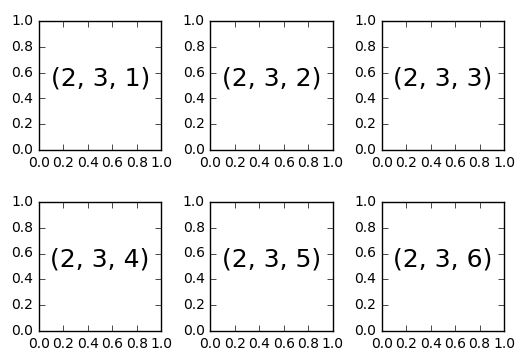



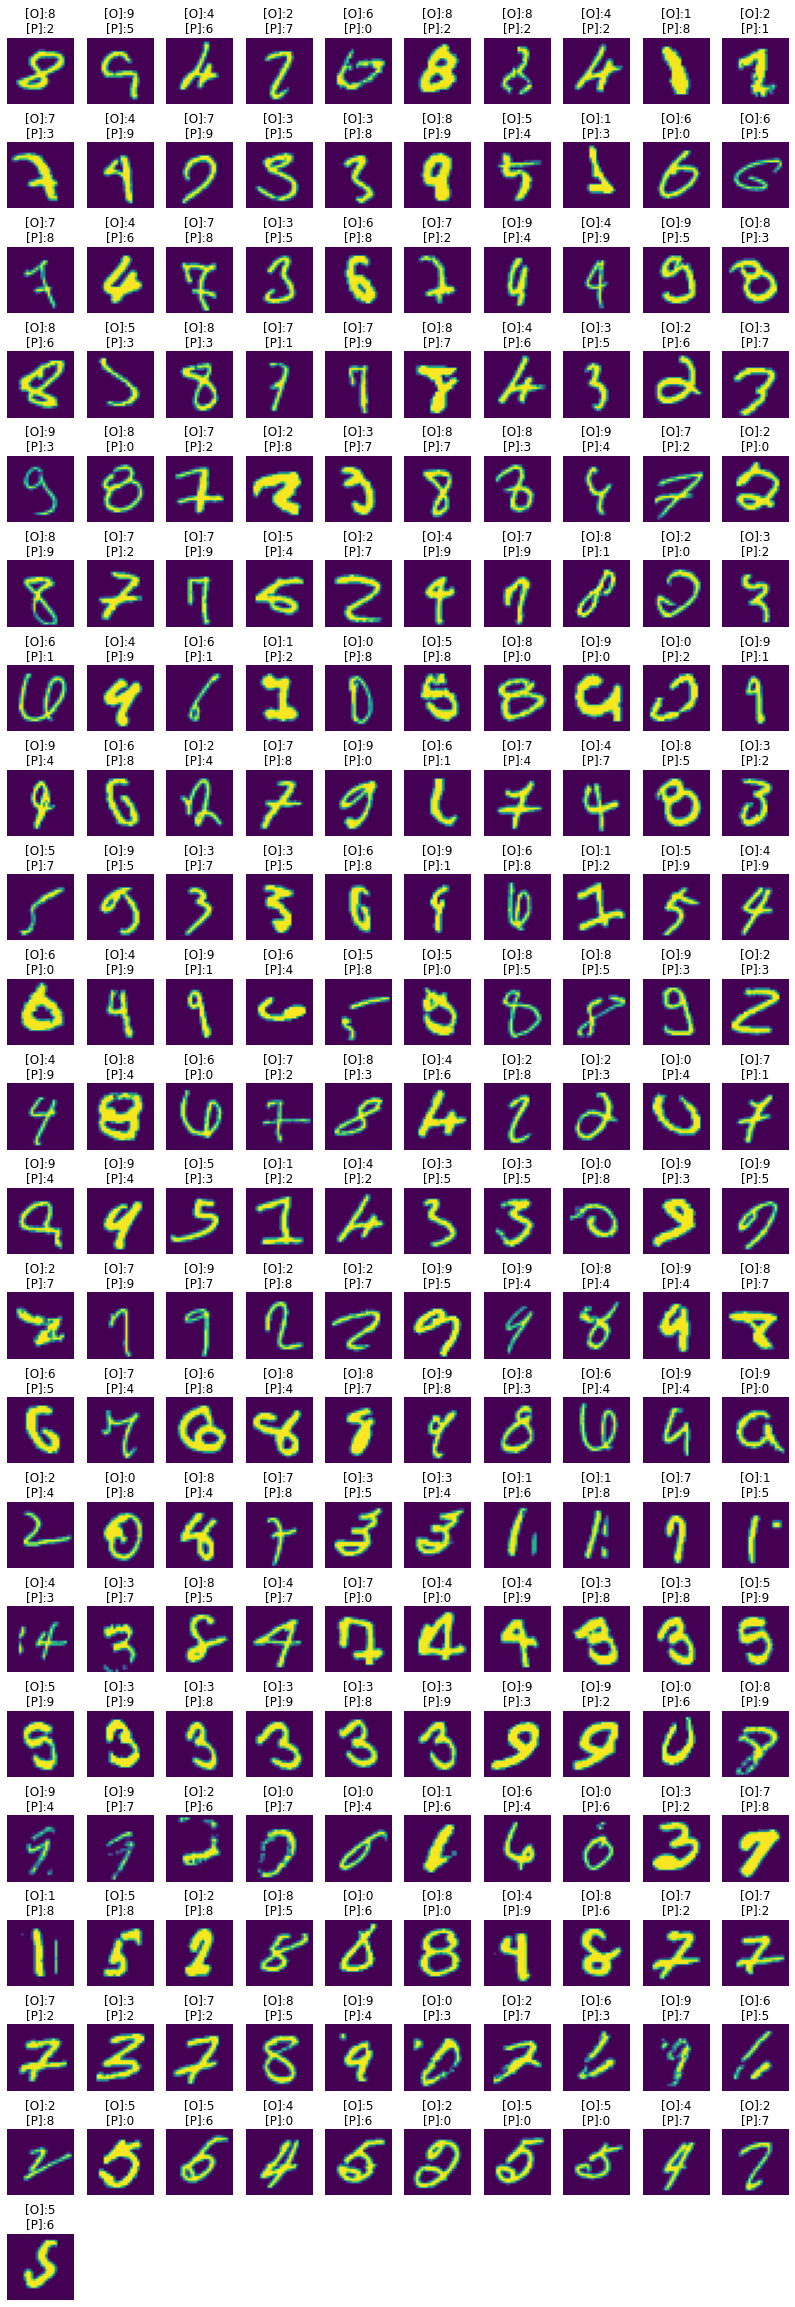

In [26]:
# 劃出錯誤的圖形
import numpy as np
# nonzero 找出所有不是0 (0=falue 1=true 意思是所有是True的)
# np.nonzero(pre != y_test) #tuple的第一個，所有錯誤的位置
idx = np.nonzero(pre != y_test)[0] #錯誤的地方
# print(len(idx)) #錯誤的數量
false_img = x_test[idx]
false_pre = pre[idx] #預測的標籤
false_label = y_test[idx] #原本的標籤
plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    plt.imshow(false_img[i])
    # subplot 不支援中文
    t = "[O]:{}\n[P]:{}".format(false_label[i], false_pre[i])
    plt.title(t)
    plt.axis("off")  # plt.axis 把軸上的標示全部去掉

In [ ]:
# Pillow
from PIL import Image
# RGB, RGBA, L(gray)
fn = input("輸入檔名:")
img = Image.open(fn).resize((28, 28)).convert("L")
img_np = np.array(img)
img_np_r = img_np.reshape(1, 784) / 255.0
proba = model.predict(img_np_r)[0]
for i in range(10):
    print(i, "的機率:", proba[i])
ans = model.predict_classes(img_np_r)[0]
print("答案:", ans)
plt.imshow(img_np)